In [1]:
print('kernel started successfully')

kernel started successfully


In [2]:
from os import listdir
from torch import load
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

import MN_Thesis_Package.utils.TrainTestScheduler as TS

# TODO

1. Make sure that targeted and un-targeted sampling for conditioning_w are never displayed on the same plot
2. Separate out scatter-plots from smoothed plots and add one dot per training run (not using averaged stuff)
3. Check and make sure no outliers exist in training runs (otherwise average could look funky)
4. Add different colored ring or something on the scatterplots to more clearly show different depths

# Numerical Tests for proofs in section 2.1

percent second inequality true give first


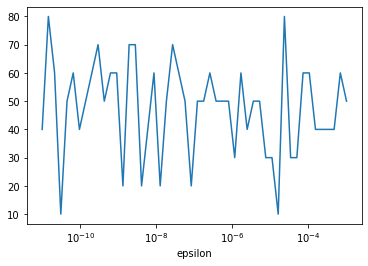

In [1]:
from numpy.linalg import norm
from numpy.random import normal, uniform
import numpy as np
from matplotlib import pyplot as plt
scale_1 = 50
scale_2 = 50
eps_1 = .000001
n = 100000
m = 100000
n_avg = 10

xs = np.logspace(-3, -11)
perc_accurate = np.zeros_like(xs)
diff_norm = np.zeros_like(xs)
for i, eps_2 in enumerate(xs):
    for _ in range(n_avg):
        u = normal(scale=scale_1, size=n)
        delta = normal(scale=scale_1)
        delta = delta * (eps_1 / norm(delta))
        v = u - delta

        x = normal(scale=scale_1, size=m)
        delta_x = normal(scale=scale_1)
        delta_x = delta_x * (eps_2 / norm(delta_x))
        y = x - delta_x


        nc = norm(u)**2
        xc = norm(x)**2
        # errors[i] += np.abs(np.inner(u-v, v) / (eps * nc * n_avg))
        # print(f'||u||^2: {1}, <u, v>: {-np.inner(u, v)/nc}, diff: {1-np.inner(u, v)/nc}, <u-v, v>: {-np.inner(u-v, v)/nc}')
        # print(norm(u-v)**2/nc, np.allclose(norm(u-v)**2/nc, (norm(u)**2 - np.inner(u, v) - np.inner(u-v, v))/nc))

        diff_norm_1 = norm(u - v)/norm(u)
        term_u1 = np.abs((nc - np.inner(u, v))/(nc*eps_1))
        diff_norm_2 = norm(x - y)/norm(x)
        term_x1 = np.abs((xc - np.inner(x, y))/(xc*eps_2))

        if diff_norm_1 < diff_norm_2:
            if term_u1 < term_x1:
                perc_accurate[i] += 1 / n_avg
        elif diff_norm_1 > diff_norm_2:
            if term_u1 > term_x1:
                perc_accurate[i] += 1 / n_avg
        else:
            print('equal...')
        # scales[i] += np.abs((nc - np.inner(u, v))/(nc*eps*n_avg))
        # print(f'left hand: {(nc - np.inner(u, v))/nc}, right hand: {(norm(v)**2 - np.inner(u, v))/nc}, total: {(nc + norm(v)**2 - 2*np.inner(u, v))/nc}')

print('percent second inequality true give first')
plt.semilogx(xs, 100*perc_accurate)
plt.xlabel('epsilon')
plt.show()

In [2]:
# scale_1 = 50
# scale_2 = 50
# n_points = 1000
# n_avg = 1000
#
# dist_1 = np.zeros(n_points)
# dist_2 = np.zeros(n_points)
# # perc_accurate_2 = np.zeros(n_points)
#
# for i in range(n_points):
#     eps_1 = uniform(0, .3)
#     theta_1_scale = eps_1 * np.pi
#     # theta_1_scale = uniform(0, eps_1 * np.pi) #np.pi/32)
#
#     eps_2 = uniform(0, .3)
#     theta_2_scale = eps_2 * np.pi
#     # theta_2_scale = uniform(eps_1*np.pi, eps_2 * np.pi) #np.pi/32, np.pi/16)
#
#     scale_1 = uniform(70, 80)
#     scale_2 = uniform(70, 80)
#
#     for _ in range(n_avg):
#         nu = uniform(scale_1, scale_1 * (1 + eps_1))
#         nv = uniform(scale_1, scale_1 * (1 + eps_1))
#         theta_1 = uniform(0, theta_1_scale)
#
#         nx = uniform(scale_2, scale_2 * (1 + eps_2))
#         ny = uniform(scale_2, scale_2 * (1 + eps_2))
#         theta_2 = uniform(0, theta_2_scale)
#
#         diff_norm_1 = np.sqrt((nu**2 + nv**2 - 2*nu*nv*np.cos(theta_1))/(nu**2))
#         term_u1 = np.abs(1 - nv/nu*np.cos(theta_1))
#         diff_norm_2 = np.sqrt((nx**2 + ny**2 - 2*nx*ny*np.cos(theta_2))/(nv**2))
#         term_x1 = np.abs(1 - ny/nx*np.cos(theta_2))
#
#         dist_1[i] += (diff_norm_2 - diff_norm_1)/n_avg
#         dist_2[i] += (term_x1 - term_u1)/n_avg
#
# plt.scatter(dist_1, dist_2)
# plt.xlabel('distance between condition inequality terms')
# plt.ylabel('distance between result inequality terms')
# plt.show()

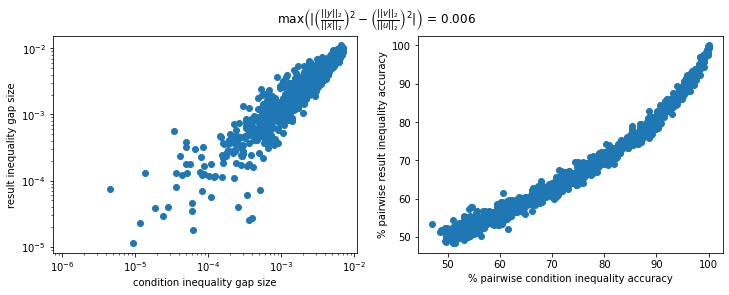

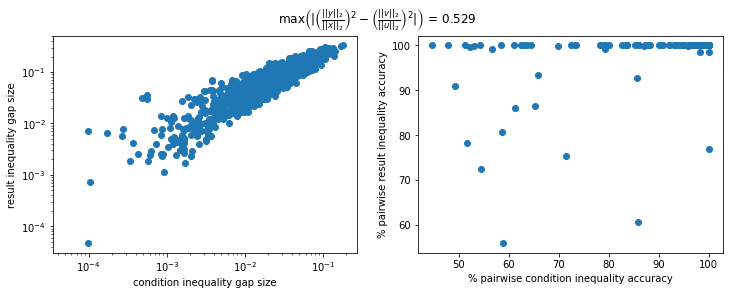

In [4]:
from numpy.linalg import norm
from numpy.random import normal, uniform
import numpy as np
from matplotlib import pyplot as plt

def sign(input_):
    if input_ > 0:
        return 1
    else:
        return -1

def plus_minus(plus):
    if plus:
        return 1
    else:
        return -1

scale_1 = 50
scale_2 = 50
n_points = 1000
n_avg = 1000

n = 1000
m = 1000

for max_length_bias in [0, 1]:
    mean_dist_condition = np.zeros(n_points)
    mean_condition_norm_1 = np.zeros(n_points)
    mean_condition_norm_2 = np.zeros(n_points)
    mean_dist_result = np.zeros(n_points)
    mean_result_norm_1 = np.zeros(n_points)
    mean_result_norm_2 = np.zeros(n_points)

    pairwise_accuracy_condition = np.zeros(n_points)
    pairwise_accuracy_result = np.zeros(n_points)

    max_eps = 0
    max_length_ratio_diff = 0

    for i in range(n_points):
        eps_1 = uniform(0, .2)
        eps_2 = uniform(0, .2)

        max_eps = max(eps_1, eps_2, max_eps)

        scale_1 = uniform(15, 100)
        scale_2 = uniform(15, 100)
        rescale_u = uniform(-max_length_bias/2, max_length_bias/2)
        rescale_v = uniform(-max_length_bias/2, max_length_bias/2)
        rescale_x = uniform(-max_length_bias/2, max_length_bias/2)
        rescale_y = uniform(-max_length_bias/2, max_length_bias/2)

        n_equal_condition = 0
        n_equal_result = 0
        for _ in range(n_avg):
            u = normal(scale=scale_1, size=m)
            delta_u = normal(scale=scale_1, size=m)
            delta_u = delta_u * (normal(loc=eps_1 * scale_1, scale=eps_1 * scale_1) / norm(delta_u))
            v = u - delta_u
            u += eps_1 * rescale_u * u
            v += eps_2 * rescale_v * v
            nu = norm(u)
            nv = norm(v)

            x = normal(scale=scale_2, size=n)
            delta_x = normal(scale=scale_2, size=n)
            delta_x = delta_x * (normal(loc=eps_2 * scale_2, scale=eps_2 * scale_2) / norm(delta_x))
            y = x - delta_x
            x += eps_2 * rescale_x * x
            y += eps_2 * rescale_y * y
            nx = norm(x)
            ny = norm(y)

            max_length_ratio_diff = max(np.abs(nu**2/nv**2 - nx**2/ny**2), max_length_ratio_diff)

            condition_norm_1 = norm(u - v)/nu
            condition_norm_2 = norm(x - y)/nx
            result_norm_1 = np.sqrt(np.abs(nu**2 - np.inner(u, v))/(nu**2))
            result_norm_2 = np.sqrt(np.abs(nx**2 - np.inner(x, y))/(nx**2))
            condition_distance = (condition_norm_2 - condition_norm_1) / n_avg
            result_distance = (result_norm_2 - result_norm_1) / n_avg

            # satisfied = (sign(condition_distance) == sign(result_distance))
            if condition_distance == 0:
                n_equal_condition += 1
            elif condition_distance > 0:
                pairwise_accuracy_condition[i] += 1 / n_avg

            if result_distance == 0:
                n_equal_result += 1
            elif result_distance > 0:
                pairwise_accuracy_result[i] += 1 / n_avg

            mean_condition_norm_1[i] += condition_norm_1 / n_avg
            mean_condition_norm_2[i] += condition_norm_2 / n_avg
            mean_result_norm_1[i] += result_norm_1 / n_avg
            mean_result_norm_2[i] += result_norm_2 / n_avg
            mean_dist_condition[i] += (condition_norm_2 - condition_norm_1) / n_avg
            mean_dist_result[i] += (result_norm_2 - result_norm_1) / n_avg

        if n_equal_condition > 0:
            pairwise_accuracy_condition[i] *= (n_avg / (n_avg - n_equal_condition))
        if n_equal_result > 0:
            pairwise_accuracy_result[i] *= (n_avg / (n_avg - n_equal_result))

        # reverse percentages if expected distance was negative
        if mean_dist_condition[i] < 0:
            pairwise_accuracy_condition[i] = 1 - pairwise_accuracy_condition[i]
        if mean_dist_result[i] < 0:
            pairwise_accuracy_result[i] = 1 - pairwise_accuracy_result[i]

        sign_condition_distance = sign(mean_dist_condition[i])
        mean_dist_condition[i] = np.abs(mean_dist_condition[i])
        mean_dist_result[i] *= sign_condition_distance

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].scatter(mean_dist_condition, mean_dist_result)
    ax[0].set_xlabel('condition inequality gap size')
    ax[0].set_ylabel('result inequality gap size')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')

    ax[1].scatter(100*pairwise_accuracy_condition, 100*pairwise_accuracy_result)
    ax[1].set_xlabel('% pairwise condition inequality accuracy')
    ax[1].set_ylabel('% pairwise result inequality accuracy')
    plt.suptitle(r'$\max{\left(\left| \left(\frac{||y||_2}{||x||_2}\right)^2 - \left(\frac{||v||_2}{||u||_2}\right)^2 \right|\right)}$ = ' + f'{max_length_ratio_diff:.3f}')
    plt.savefig(f'plots/similar_vector_simulation_{max_length_bias}.pdf', bbox_inches='tight', dpi=3000)
    plt.show()

# See what tests are scheduled

In [3]:
scheduler = TS.TrainingScheduler()
for result in scheduler.scheduled_test_results(compact=True):
    print(result)

+ targeted_vs_random_sampling_convergence_test for ConvNet_11 on cifar10 completed in 6.5 minutes
+ Res_and_Conv_All_Metrics for ConvNet_3 on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for ConvNet_3_no_norm on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for Ortho_FC_3_no_norm on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for ResNet_3 on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for ResNet_3_no_norm on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for ConvNet_11 on cifar10 completed in 1.1 minutes
+ Res_and_Conv_All_Metrics for ConvNet_11_no_norm on cifar10 completed in 1.0 minutes
+ Res_and_Conv_All_Metrics for Ortho_FC_11_no_norm on cifar10 completed in 0.2 minutes
+ Res_and_Conv_All_Metrics for ResNet_11 on cifar10 completed in 1.2 minutes
+ Res_and_Conv_All_Metrics for ResNet_11_no_norm on cifar10 completed in 1.0 minutes
+ Res_and_Conv_All_Metrics for ConvNet_26 on cifar10 completed in 3.0 minutes
+ R

# Load all results from a test

In [4]:
root = 'TrainingSchedulerFiles/results/'
test_template_folders = ['convergence_tests_all_metrics/', 'convergence_tests_no_opacus/']
metric_names = []
non_metric_names = ['iter', 'epoch', 'lr', 'training_loss', 'testing_loss', 'test_accuracy']
exclude_failed = True

results = dict()
for test_template_folder in test_template_folders: # this assumes no model names are shared between tests, which should be true in this use case
    for dataset in listdir(root + test_template_folder):
        dataset_folder = root + test_template_folder + f'{dataset}/'

        if dataset not in results.keys():
            results[dataset] = dict()

        for model_name in listdir(dataset_folder):
            results[dataset][model_name] = dict()
            model_folder = dataset_folder + f'{model_name}/'
            test_files = listdir(model_folder)

            excluded = []
            for filename in test_files:
                test_num = int(filename.strip('.results').strip('.model').strip('.stats').strip('_'))
                if exclude_failed and '.stats' in filename:
                    report = load(model_folder + f'/{filename}')
                    if report['error'] is not None:
                        excluded += [test_num]
                elif test_num not in excluded and '.results' in filename:
                    results[dataset][model_name][test_num] = load(model_folder + f'/{filename}')

                    for metric_name in results[dataset][model_name][1]['metrics'].keys():
                        if metric_name not in metric_names and metric_name not in non_metric_names:
                            metric_names += [metric_name]

            # remove results from failed tests if they got saved
            for i_excluded in excluded:
                if i_excluded in results[dataset][model_name].keys():
                    del results[dataset][model_name][i_excluded]
            if len(results[dataset][model_name].keys()) == 0:
                del results[dataset][model_name]

# Generate Plots

In [5]:
def moving_average(input_, width):
    return np.convolve(input_, np.ones(width), 'valid') / width

In [6]:
from matplotlib.lines import Line2D
color_choice = {'ConvNet': 'lime',
                'ResNet': 'green',
                'LooksLinear': 'cyan',
                'CReLU': 'blue',
                'Ortho': 'slateblue'}
line_choice = {'norm': None,
               'no_norm': '--'}

tex_names = {'conditioning_x': '$\kappa^\gtrapprox_{h_\mathbb{W}, \mathbb{X}}(w, x, t)$',
             'input_grad_rank_x': '$\Delta_\mathbb{X}R(h_\mathbb{X}, w, \chi)$',
             'weight_grad_rank_x': '$\Delta_\mathbb{X}R(h_\mathbb{W}, w, \chi)$',
             'coherence_x': '$\Delta_\mathbb{X}H(w)$',
             'confusion_x': '$\Delta_\mathbb{X}C_n(w)$',
             'diversity_x': '$\Delta_\mathbb{X}D_n(w)$',
             'conditioning_w': '$\kappa^\gtrapprox_{h_\mathbb{W}, \mathbb{W}}(w, x, t)$',
             'coherence_w': '$\Delta_\mathbb{W}H(w, \chi)$',
             'confusion_w': '$\Delta_\mathbb{W}C^*_n(w, \chi)$',
             'diversity_w': '$\Delta_\mathbb{W}D_n(w, \chi)$',}


legend_elements_line = []
legend_elements_scat = [Line2D([0], [0], color='black', lw=0, marker='o', label='With Normalization'),
                        Line2D([0], [0], color='black', lw=0, marker='s', label='Without Normalization'),]

for model_type, color in color_choice.items():
    legend_elements_line += [Line2D([0], [0], color=color, lw=2, label=model_type)]
    legend_elements_scat += [Line2D([0], [0], color=color, lw=0, marker='o', label=model_type)]

In [7]:
average_over = 20
iterations_between_samples = 300

# calculate smoothed loss and slope of loss
loss_smooth_dict = dict()
loss_slope_smooth_dict = dict()

test_averaged_loss_smooth_dict = dict()
test_averaged_loss_slope_smooth_dict = dict()
for dataset, d_results in results.items():
    loss_smooth_dict[dataset] = dict()
    loss_slope_smooth_dict[dataset] = dict()
    for model_name, m_results in d_results.items():
        loss_smooth_dict[dataset][model_name] = dict()
        loss_slope_smooth_dict[dataset][model_name] = dict()

        loss_smooth = None
        loss_curve_smooth = None
        shortest_x = None
        n_averaged_over = 0

        for i, test_i_results in m_results.items():
            # loss_smooth = None

            x = np.array(test_i_results['metrics']['iter'])
            if shortest_x is None or len(x) < len(shortest_x):
                shortest_x = x
            if loss_smooth is not None:
                loss_smooth = loss_smooth[:(len(shortest_x)-(average_over-1))]
                loss_curve_smooth = loss_curve_smooth[:(len(shortest_x)-(average_over))]

            y = moving_average(test_i_results['metrics']['training_loss'], average_over)
            yp = moving_average((np.array(test_i_results['metrics']['training_loss'][1:])
                                - np.array(test_i_results['metrics']['training_loss'][:-1]))/(x[1]-x[0]), average_over)

            if loss_smooth is None:
                loss_smooth = y[:(len(shortest_x)-(average_over-1))]
                loss_curve_smooth = yp[:(len(shortest_x)-(average_over))]
            else:
                loss_smooth += y[:(len(shortest_x)-(average_over-1))]
                loss_curve_smooth += yp[:(len(shortest_x)-(average_over))]
            n_averaged_over += 1


        if len(m_results.keys()) > 0:
            loss_smooth_dict[dataset][model_name] = loss_smooth / n_averaged_over
            loss_slope_smooth_dict[dataset][model_name] = np.abs((loss_curve_smooth / n_averaged_over) / iterations_between_samples)

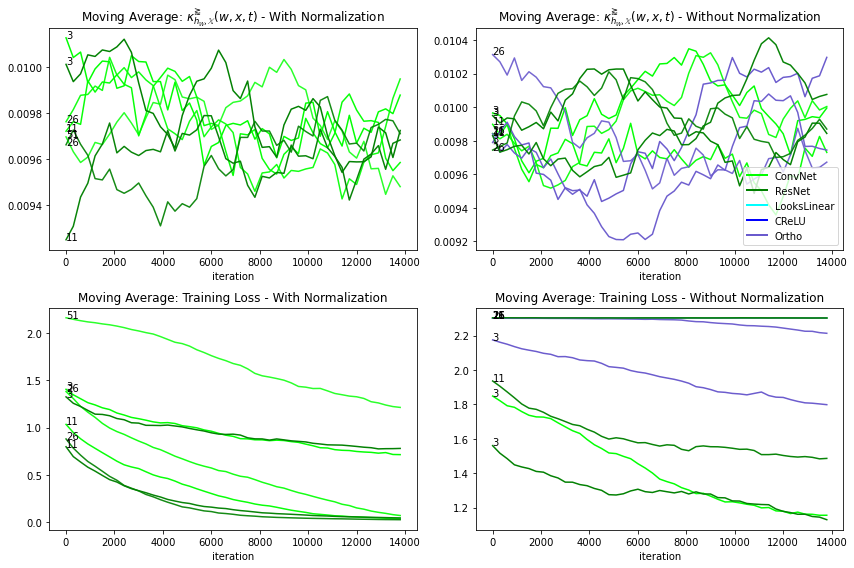

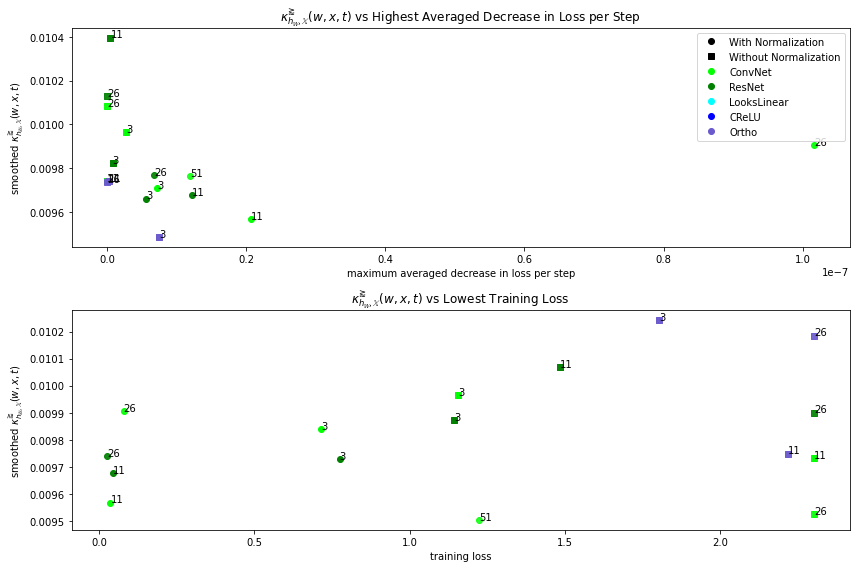

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


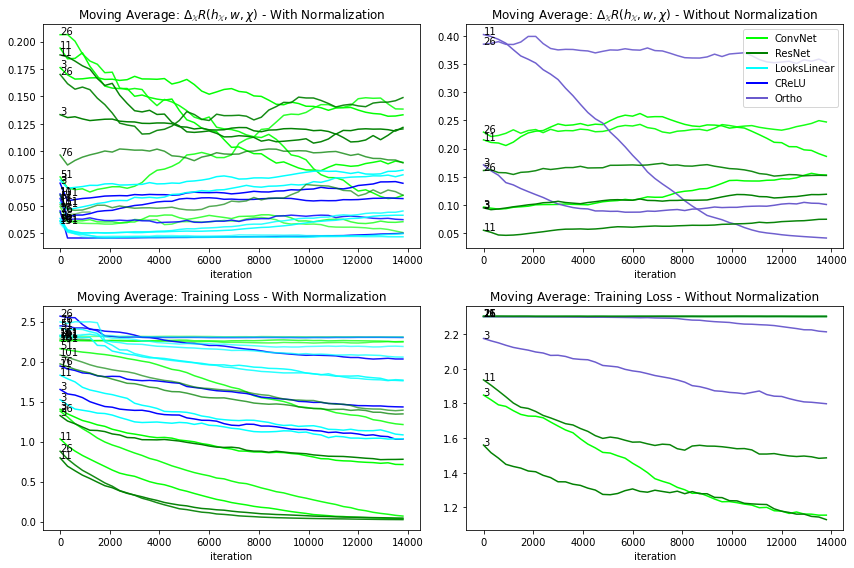

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


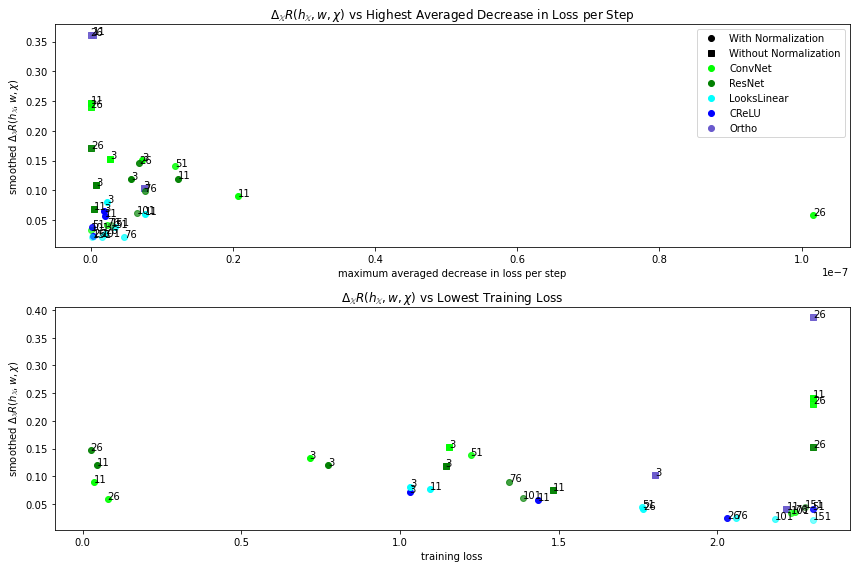

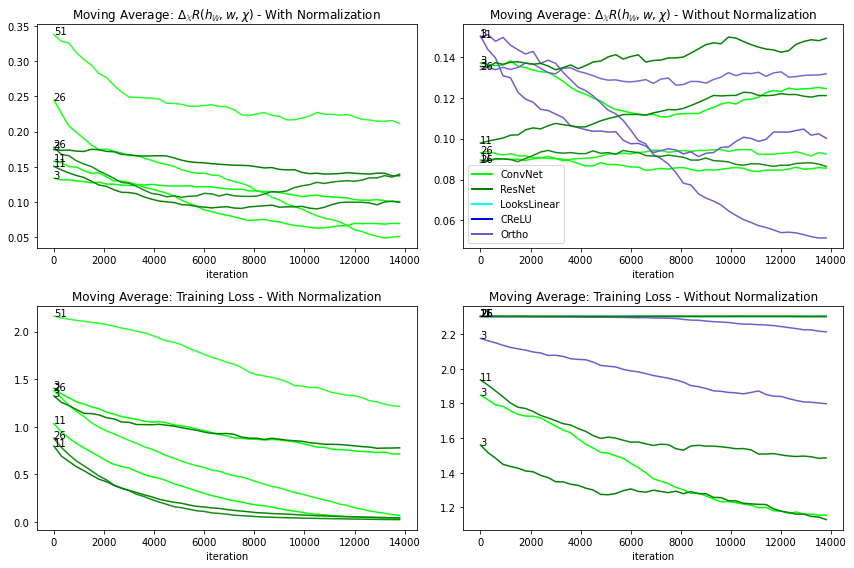

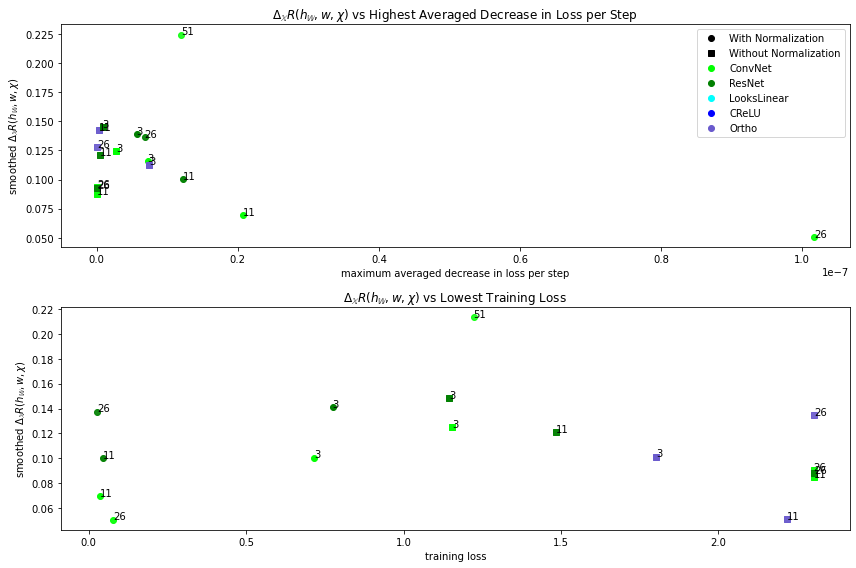

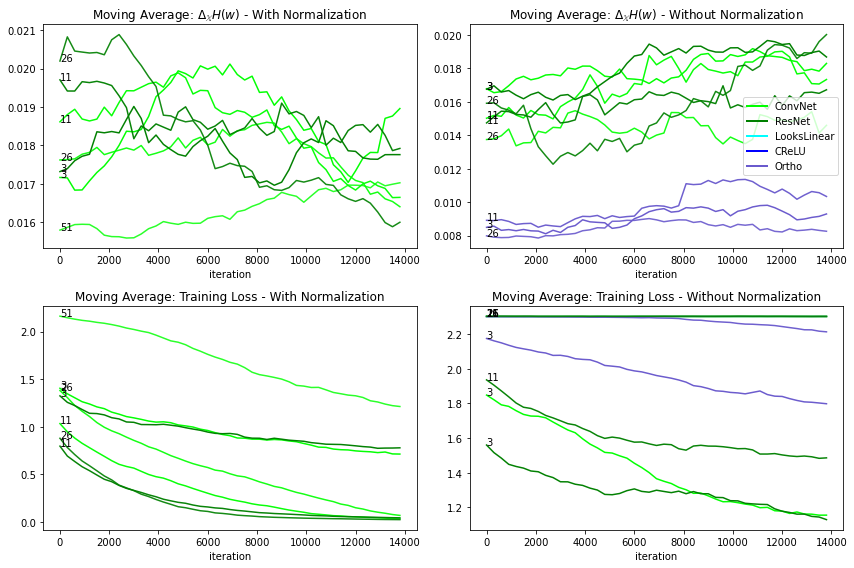

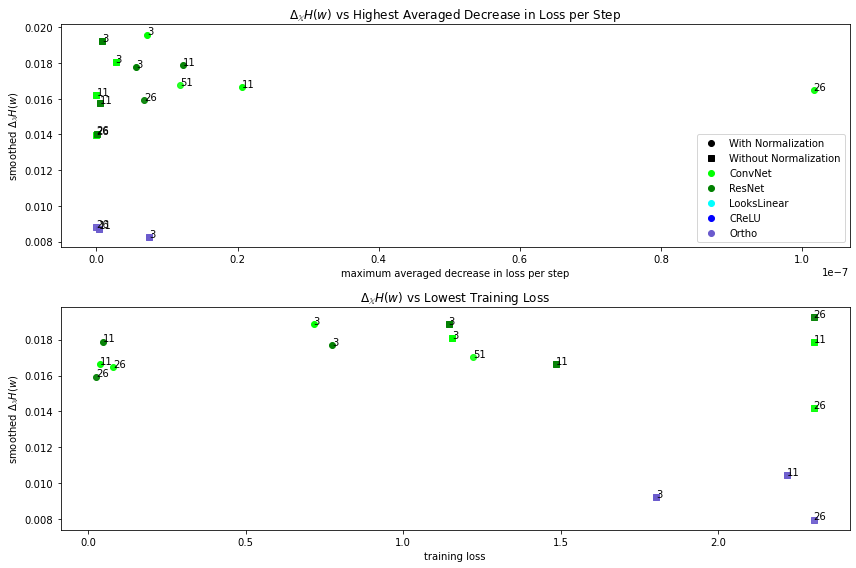

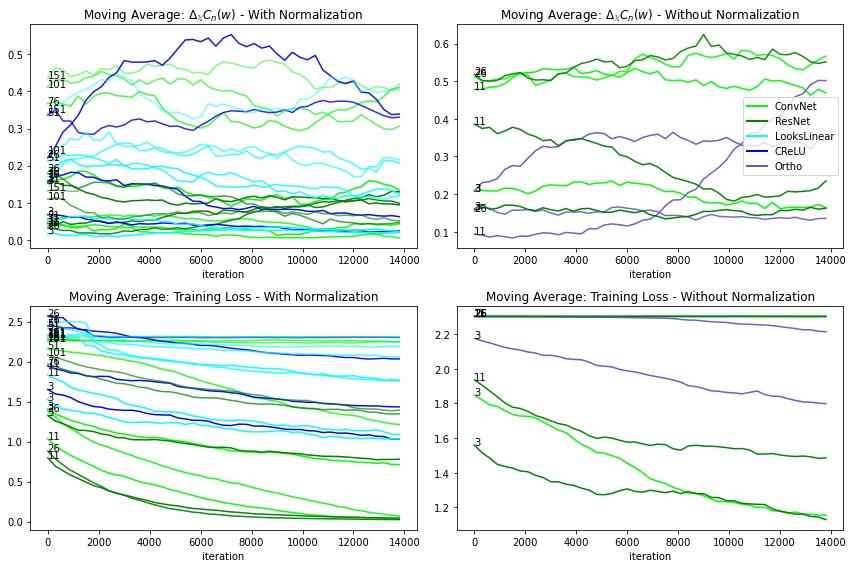

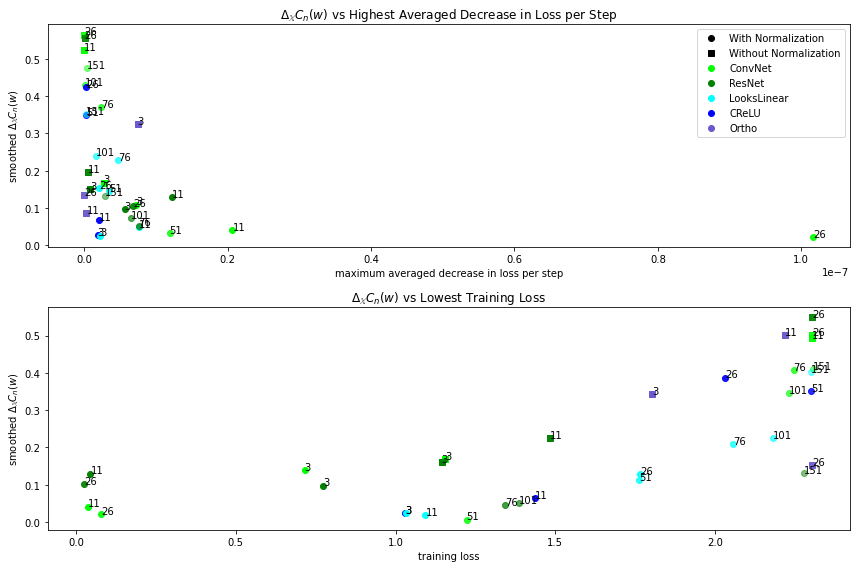

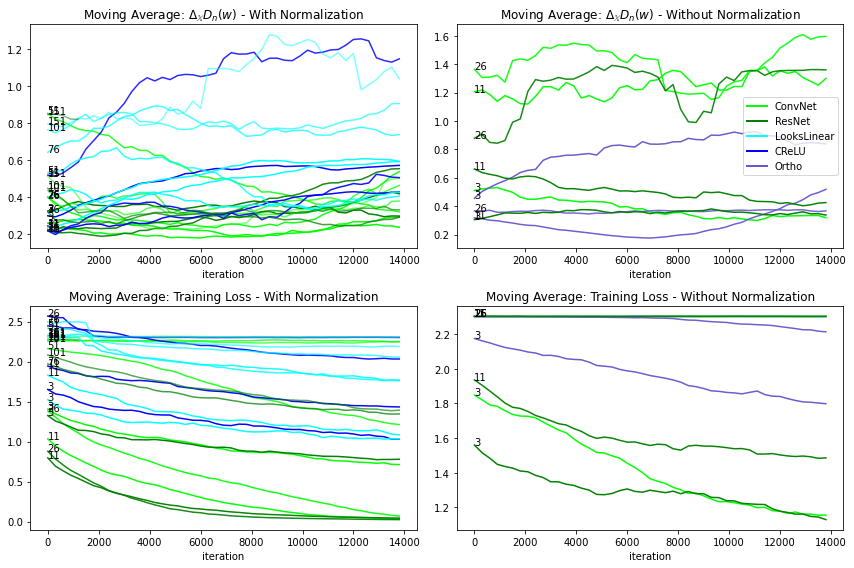

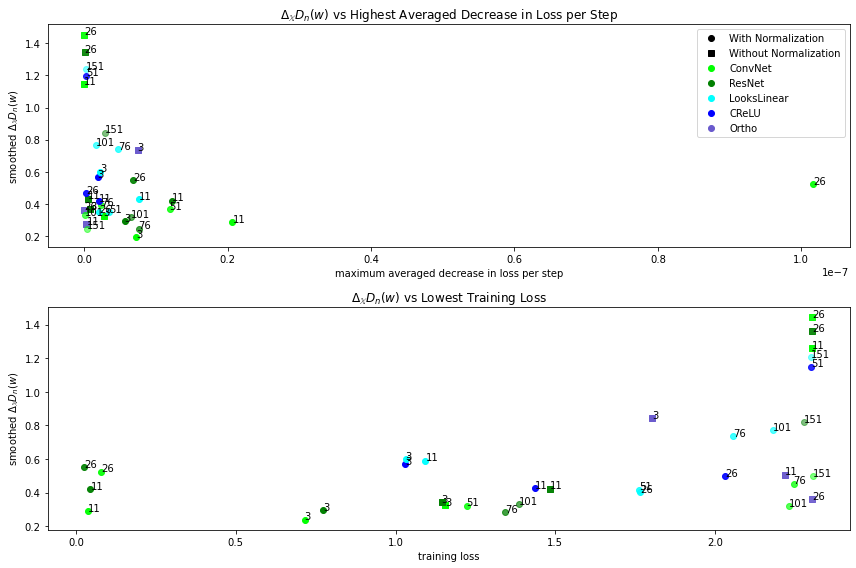

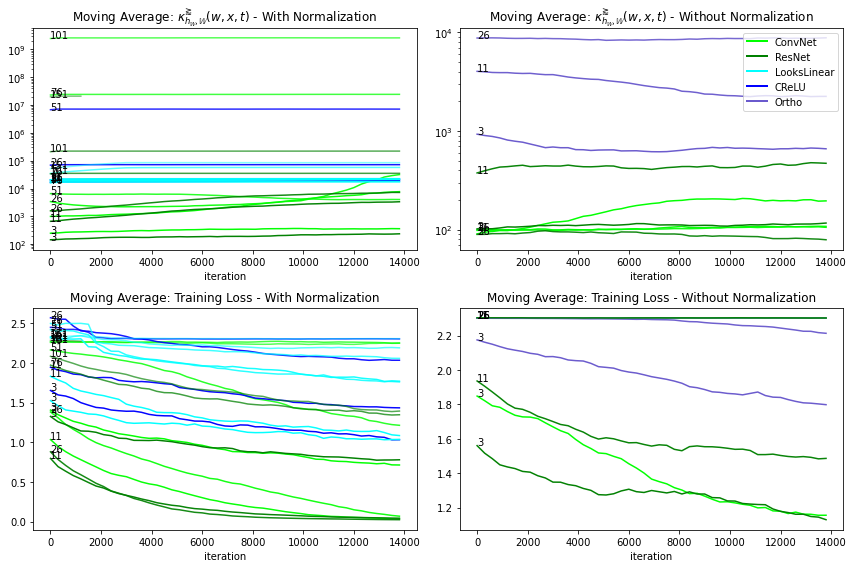

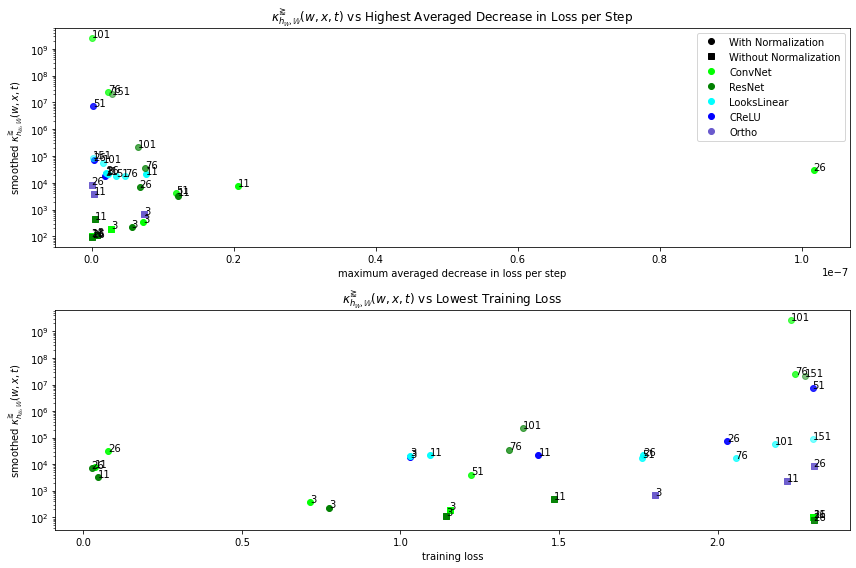

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


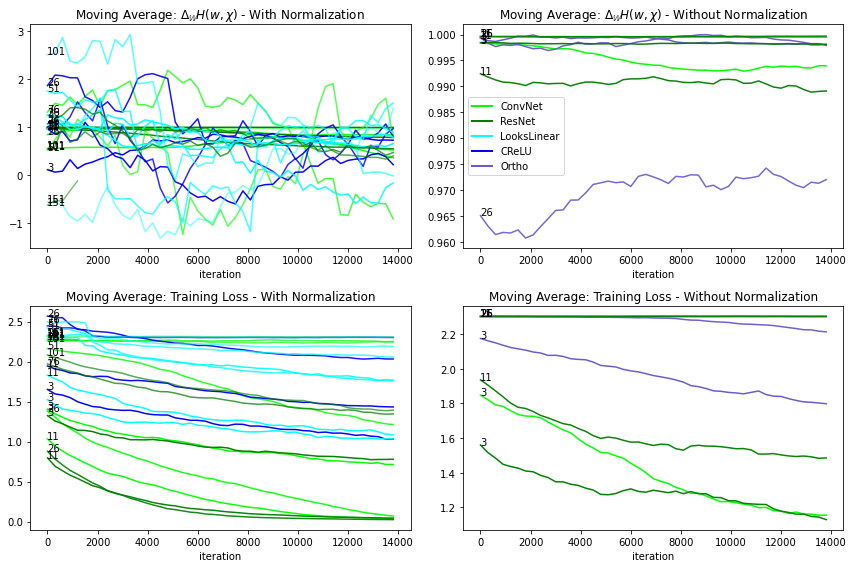

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [11]:
log_metrics = ('conditioning_w')
excluded_models = ['CReLU_FC_11_no_norm', 'CReLU_FC_26_no_norm'] # ['ResNet_26_no_norm']

# max_iters = set()
for metric_name in metric_names:
    for plot_type in ['line', 'scatter']:
        if plot_type == 'line':
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        else:
            fig, ax = plt.subplots(nrows=2, figsize=(12, 8))

        scatter_y_points = []
        for dataset, d_results in results.items():
            for model_name, m_results in d_results.items():
                if metric_name not in m_results[1]['metrics']:
                    continue
                if model_name in excluded_models:
                    continue
                color = color_choice[model_name.split('_')[0]]
                n_layers = int(model_name.strip('_no_norm').split('_')[-1])

                y_averaged = None
                n_averaged_over = 0
                shortest_x = None
                for i, test_i_results in m_results.items():

                    if i == 1:
                        label_str = f'{model_name}'
                    else:
                        label_str = None

                    x = np.array(test_i_results['metrics']['iter'])
                    if shortest_x is None or len(x) < len(shortest_x):
                        shortest_x = x
                    if y_averaged is not None:
                        y_averaged = y_averaged[:(len(shortest_x)-(average_over-1))]

                    iter_reset_locs = [idx for idx, value in enumerate(x) if value == 0]
                    for idx in iter_reset_locs[1:]:
                        x[idx:] += x[idx-1]
                    # if x[-1] not in max_iters:
                    #     max_iters.add(x[-1])

                    if type(test_i_results['metrics'][metric_name]) is dict:
                        for mask_name in test_i_results['metrics'][metric_name]:
                            y = test_i_results['metrics'][metric_name][mask_name]
                            if len(np.shape(y)) > 1:
                                y = np.mean(y, axis=1)
                            if y_averaged is None:
                                y_averaged = moving_average(y, average_over)[:(len(shortest_x)-(average_over-1))]
                            else:
                                y_averaged += moving_average(y, average_over)[:(len(shortest_x)-(average_over-1))]
                            n_averaged_over += 1 # this pretty much assumes there is only one mask, but that should be true for all tests currently saved that aren't specifically mask tests
                            # plt.plot(x[:-(average_over-1)], moving_average(y, average_over), linestyle=line_style, color=color, alpha=(1-n_layers/300))
                    else:
                        y = test_i_results['metrics'][metric_name]
                        if y_averaged is None:
                            y_averaged = moving_average(y, average_over)[:(len(shortest_x)-(average_over-1))]
                        else:
                            y_averaged += moving_average(y, average_over)[:(len(shortest_x)-(average_over-1))]
                        n_averaged_over += 1
                        # plt.plot(x[:-(average_over-1)], moving_average(y, average_over), linestyle=line_style, color=color, alpha=(1-n_layers/300))
                    y_averaged = y_averaged / n_averaged_over

                if len(y_averaged) < 3:
                    print('skipped network ', model_name)
                    continue
                if np.max(y) > 10**10:
                    continue

                best_loss_gain_loc = np.argmin(loss_slope_smooth_dict[dataset][model_name])
                best_loss_loc = min(np.argmin(loss_smooth_dict[dataset][model_name]), len(y_averaged)-2)
                scatter_y_points += [(y_averaged[best_loss_gain_loc] + y_averaged[best_loss_gain_loc + 1])/2]

                if len(m_results.keys()) > 0:
                    if plot_type == 'line':
                        col_idx = 0
                        if 'norm' in model_name:
                            col_idx = 1
                        ax[0][col_idx].plot(shortest_x[:-(average_over-1)], y_averaged, color=color, alpha=(1-n_layers/300))
                        ax[0][col_idx].text(-5, y_averaged[0], str(n_layers))
                        ax[1][col_idx].plot(shortest_x[:-(average_over-1)], loss_smooth_dict[dataset][model_name],
                                            color=color, alpha=(1-n_layers/300))
                        ax[1][col_idx].text(-5,  loss_smooth_dict[dataset][model_name][0], str(n_layers))

                    else:
                        if 'norm' not in model_name:
                            ax[0].scatter(loss_slope_smooth_dict[dataset][model_name][best_loss_gain_loc], (y_averaged[best_loss_gain_loc] + y_averaged[best_loss_gain_loc + 1])/2,
                                          color=color, alpha=(1-n_layers/300), marker='o')
                            ax[0].text(loss_slope_smooth_dict[dataset][model_name][best_loss_gain_loc], (y_averaged[best_loss_gain_loc] + y_averaged[best_loss_gain_loc + 1])/2,
                                     str(n_layers))
                            ax[1].scatter(loss_smooth_dict[dataset][model_name][best_loss_loc], (y_averaged[best_loss_loc] + y_averaged[best_loss_loc + 1])/2,
                                          color=color, alpha=(1-n_layers/300), marker='o')
                            ax[1].text(loss_smooth_dict[dataset][model_name][best_loss_loc], (y_averaged[best_loss_loc] + y_averaged[best_loss_loc + 1])/2,
                                       str(n_layers))
                        else:
                            ax[0].scatter(loss_slope_smooth_dict[dataset][model_name][best_loss_gain_loc], (y_averaged[best_loss_gain_loc] + y_averaged[best_loss_gain_loc + 1])/2,
                                          color=color, alpha=(1-n_layers/300), marker='s')
                            ax[0].text(loss_slope_smooth_dict[dataset][model_name][best_loss_gain_loc], (y_averaged[best_loss_gain_loc] + y_averaged[best_loss_gain_loc + 1])/2,
                                          str(n_layers))
                            ax[1].scatter(loss_smooth_dict[dataset][model_name][best_loss_loc], (y_averaged[best_loss_loc] + y_averaged[best_loss_loc + 1])/2,
                                          color=color, alpha=(1-n_layers/300), marker='s')
                            ax[1].text(loss_smooth_dict[dataset][model_name][best_loss_loc], (y_averaged[best_loss_loc] + y_averaged[best_loss_loc + 1])/2,
                                          str(n_layers))

                    # ax[2].plot(shortest_x[:-(average_over)], loss_slope_smooth_dict[dataset][model_name], linestyle=line_style, color=color, alpha=(1-n_layers/300))
        if metric_name in log_metrics:
            if plot_type == 'line':
                ax[0][0].set_yscale('log')
                ax[0][1].set_yscale('log')
            else:
                ax[0].set_yscale('log')
                ax[1].set_yscale('log')

        mean_y_samples = np.mean(scatter_y_points)
        std_y_samples = np.std(scatter_y_points)
        new_scatter_y_points = np.array(scatter_y_points)
        new_scatter_y_points = new_scatter_y_points[new_scatter_y_points < mean_y_samples + 6*std_y_samples]
        new_scatter_y_points = new_scatter_y_points[new_scatter_y_points > mean_y_samples - 6*std_y_samples]

        if plot_type == 'line':

            for i in range(2):
                # ax[i].set_xlim(0)
                ax[0][i].set_xlabel('iteration')
                ax[1][i].set_xlabel('iteration')
            ax[0][0].set_title(f'Moving Average: {tex_names[metric_name]} - With Normalization')
            ax[0][1].set_title(f'Moving Average: {tex_names[metric_name]} - Without Normalization')
            ax[1][0].set_title('Moving Average: Training Loss - With Normalization')
            ax[1][1].set_title('Moving Average: Training Loss - Without Normalization')

            # if len(new_scatter_y_points) > 0:
            #     ax[0][i].set_ylim(.9*min(new_scatter_y_points), 1.1*max(new_scatter_y_points))
            ax[0][1].legend(handles=legend_elements_line)

        else:
            ax[0].set_title(f'{tex_names[metric_name]} vs Highest Averaged Decrease in Loss per Step')
            ax[1].set_title(f'{tex_names[metric_name]} vs Lowest Training Loss')
            ax[0].set_ylabel(f'smoothed {tex_names[metric_name]}')
            ax[0].set_xlabel('maximum averaged decrease in loss per step')
            ax[1].set_ylabel(f'smoothed {tex_names[metric_name]}')
            ax[1].set_xlabel('training loss')

            # if len(new_scatter_y_points) > 0:
            #     ax[0].set_ylim(.9*min(new_scatter_y_points), 1.1*max(new_scatter_y_points))
            #     ax[1].set_ylim(.9*min(new_scatter_y_points), 1.1*max(new_scatter_y_points))

            ax[0].legend(handles=legend_elements_scat)

        plt.tight_layout()
        if plot_type == 'line':
            plt.savefig(f'plots/convergence_metric_tests/{metric_name}.pdf', bbox_inches='tight', dpi=3000)
        else:
            plt.savefig(f'plots/convergence_metric_tests/{metric_name}_scatter.pdf', bbox_inches='tight', dpi=3000)
        plt.show()

In [9]:
# import numpy as np
#
# def condition_number_summary(x, f, delta, precision_f):
#     fx = f(x)
#     ak = np.abs(f(x + delta) - fx)/np.abs(delta)
#     rk = ak * np.abs(x/fx)
#     print(f'absolute condition number: {ak}')
#     print(f'relative condition number: {rk}')
#     print(f'x: {x}, m_eps at x: {np.spacing(precision_f(x))}')
#     print(f'f(x): {fx}, m_eps at f(x): {np.spacing(precision_f(fx))}')
#     print(f'worst change at f(x): {ak*delta}')
#     print(f'as a multiple of m_eps: {(ak*delta)/np.spacing(precision_f(fx))}\n')
#
# prec_f = np.float32
# for x in [1, 50]:
#     delta = np.spacing(prec_f(x))/2
#     condition_number_summary(x, np.exp, delta, prec_f)

In [10]:
# import numpy as np
# from matplotlib import pyplot as plt
# A = np.random.random(size=(50, 50))
#
# x = np.linspace(0, 51, 50)
# yq = np.quantile(A, [0.0, .25, .5, .75, 1.0] , axis=0)
#
#
# fig, ax = plt.subplots()
# ax.plot(x, yq[2, :], '-')
# ax.fill_between(x, yq[1, :], yq[3, :], alpha=0.2)
# ax.fill_between(x, yq[0, :], yq[4, :], alpha=0.2)
#
# plt.title('LR Quartiles')
# plt.ylabel('learning rate')
# plt.xlabel('epoch')
# plt.show()

C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\envs\deepLearning\lib\site-packages\numpy\core\_methods.py:189: Ru

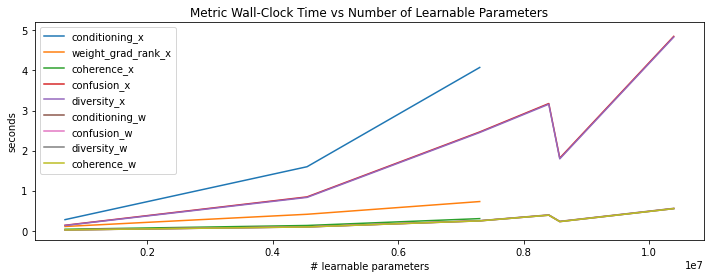

In [42]:
metric_timing_per_model = dict()
n_parameters = {3: 695000,
                11: 4550000,
                26: 7300000,
                51: 8575000,
                76: 8400000,
                101: 10390000,
                151: 10610000,
                201: 13220000}
plt.figure(figsize=(12, 4))
for metric_name in metric_names:
    for dataset, d_results in results.items():
        metric_timing_per_model[metric_name] = dict()
        for model_name, m_results in d_results.items():
            n_layers = int(model_name.strip('_no_norm').split('_')[-1])
            if n_layers not in metric_timing_per_model[metric_name].keys():
                metric_timing_per_model[metric_name][n_layers] = []
            for i, test_i_results in m_results.items():
                if metric_name in test_i_results['metrics'].keys() and type(test_i_results['metrics'][metric_name]) is dict:
                    for mask_name in test_i_results['metrics'][metric_name]:
                        if '100' in mask_name:
                            metric_timing_per_model[metric_name][n_layers] += list(np.array(test_i_results['timing'][metric_name][mask_name]).flatten())

        if metric_name == 'input_grad_rank_x':
            continue

        # print(metric_timing_per_model[metric_name])
        n_layers = list(metric_timing_per_model[metric_name].keys())
        n_params = [n_parameters[n] for n in n_layers]
        order = np.argsort(n_params)
        n_layers = np.array(n_layers)[order]
        n_params = np.array(n_params)[order]
        # print(metric_name, [np.mean(metric_timing_per_model[metric_name][n]) for n in n_layers])
        plt.plot(n_params, [np.mean(metric_timing_per_model[metric_name][n]) for n in n_layers], label=metric_name)
        # for n_layers, t in metric_timing_per_model[metric_name].items():
        #     plt.scatter([n_layers]*len(t), t)
plt.title('Metric Wall-Clock Time vs Number of Learnable Parameters')
plt.xlabel('# learnable parameters')
plt.ylabel('seconds')
plt.legend()
plt.savefig(f'plots/convergence_metric_tests/metric_timing.pdf', bbox_inches='tight', dpi=3000)
plt.show()